# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report 

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [3]:
import sklearn
sklearn.__version__

'0.22.2.post1'

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [4]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

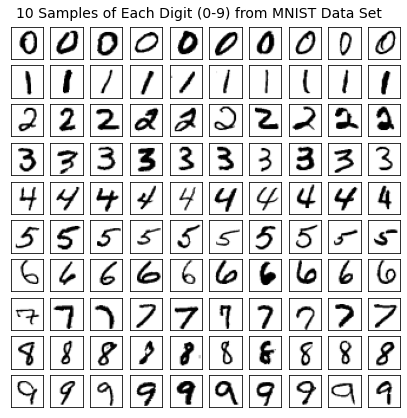

In [5]:
#def P1(num_examples=10):

### STUDENT START ###

#Setup the plot grid and stlying 
f, axarr = plt.subplots(10, 10,figsize=(7,7))
plt.set_cmap('binary')
plt.setp(axarr, xticks=[], yticks=[])
plt.suptitle('10 Samples of Each Digit (0-9) from MNIST Data Set', y=0.92, fontsize=14)

#Iterate through each of the 10 digits
for d in range(10):
    n = 0
    #Iterate through the scanned digits
    for i in range(len(mini_train_labels)):
        #l stands for lable, which we want as an int
        l = int(mini_train_labels[i])
        #We want 10 samples of each digit
        #If the scanned digit matches the value we want for this row, render that item
        if n < 10 and l==d:
            axarr[d, n].imshow(mini_train_data[i].reshape(28,28))
            n += 1
### STUDENT END ###

#P1(10)

### Part 2:

Produce k-Nearest Neighbors models with k $\in$ [1,3,5,7,9].  Evaluate and show the accuracy of each model. For the 1-Nearest Neighbor model, additionally show the precision, recall, and F1 for each label. Which digit is the most difficult for the 1-Nearest Neighbor model to recognize?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.

In [6]:
#def P2(k_values):

### STUDENT START ###

print("Evaluate and show the accuracy of each model:")
k_values = [1, 3, 5, 7, 9]
accuracies = []
for k in k_values:
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(mini_train_data, mini_train_labels)
  test_predicted_labels = model.predict(dev_data)
  accuracies.append(sklearn.metrics.accuracy_score(dev_labels, test_predicted_labels))
  print("K = ", k, "Accuracy score:", accuracies[-1])

#Use KNeighborsClassifier to produce a k-nearest neighbor model
k1model = KNeighborsClassifier(n_neighbors=1)
#Train on the mini train set.
k1model.fit(mini_train_data, mini_train_labels)
#Evaluate performance on the dev set.
test_predicted_labels = k1model.predict(dev_data)

report = classification_report(dev_labels, test_predicted_labels, output_dict=False)

print("\n\nOutput performance of K=1 model on each digit:")
print(report)

#dev_data, dev_labels = X[60000:61000], Y[60000:61000]

### STUDENT END ###

#k_values = [1, 3, 5, 7, 9]
#P2(k_values)

Evaluate and show the accuracy of each model:
K =  1 Accuracy score: 0.884
K =  3 Accuracy score: 0.876
K =  5 Accuracy score: 0.882
K =  7 Accuracy score: 0.877
K =  9 Accuracy score: 0.875


Output performance of K=1 model on each digit:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000



ANSWER: The model has the most difficulty recognizing the digit 8, which as an f1-score of 0.8. I use the f1-score as the primary metric to evaluate the model. On this [reference page for the classification_report](https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html) it states 
>As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.
The f1-score considers the number of times that the model is correct when it makes a guess (precision-true positive) as well as the number of times that it fails to predict the digit (recall-false negatives).  The model performs most poorly in terms of recall on the digit 8, meaning it fails to identify images that are actualy 8s. Looking at the samples of 8s in 10x10 table it is not obvious to my as a human why 8s are more difficult to predict, so I will need to analyze further to improve the model. 

Also, as for the models with different levels of K, the K=1 model performs the best, with an f1 score of 0.88. All the models are very close around 0.87-0.88, but K=1 was the best. 

### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on subsets of the train set.  For each subset, take just the first part of the train set without re-ordering.
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

In [7]:
#def P3(train_sizes, accuracies):

### STUDENT START ###

print("Evaluate and show the accuracy of each model:")
train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
for s in train_sizes:
  train_data, train_labels = X[:s], Y[:s]
  model = KNeighborsClassifier(n_neighbors=1)
  start_time_train = time.time()
  model.fit(train_data, train_labels)
  end_time_train = time.time()

  start_time_predict = time.time()
  test_predicted_labels = model.predict(dev_data)
  end_time_predict = time.time()
  train_time = end_time_train - start_time_train
  predict_time = end_time_predict - start_time_predict

  accuracies.append(sklearn.metrics.accuracy_score(dev_labels, test_predicted_labels))
  report_dict = classification_report(dev_labels, test_predicted_labels, output_dict=True)
  print("Train size = ", s)
  print("\t", "Accuracy score:", accuracies[-1])
  print("\t", report_dict['weighted avg'])
  print("\t", "Train time:", round(train_time, 2))
  print("\t", "Predict time:", round(predict_time, 2))

### STUDENT END ###

#train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
#accuracies = []
#P3(train_sizes, accuracies)

Evaluate and show the accuracy of each model:
Train size =  100
	 Accuracy score: 0.702
	 {'precision': 0.7199327380581098, 'recall': 0.702, 'f1-score': 0.6923512972253677, 'support': 1000}
	 Train time: 0.0
	 Predict time: 0.18
Train size =  200
	 Accuracy score: 0.791
	 {'precision': 0.7982689549291467, 'recall': 0.791, 'f1-score': 0.7879512906499233, 'support': 1000}
	 Train time: 0.01
	 Predict time: 0.33
Train size =  400
	 Accuracy score: 0.811
	 {'precision': 0.8173378031221501, 'recall': 0.811, 'f1-score': 0.8089786059656877, 'support': 1000}
	 Train time: 0.02
	 Predict time: 0.66
Train size =  800
	 Accuracy score: 0.866
	 {'precision': 0.8685229166679252, 'recall': 0.866, 'f1-score': 0.8652497516329147, 'support': 1000}
	 Train time: 0.04
	 Predict time: 1.32
Train size =  1600
	 Accuracy score: 0.905
	 {'precision': 0.9066949904965361, 'recall': 0.905, 'f1-score': 0.9046599500414992, 'support': 1000}
	 Train time: 0.1
	 Predict time: 2.79
Train size =  3200
	 Accuracy score

# Part 4:

Produce a linear regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data.  What's wrong with using linear regression here?

Apply a transformation to the predictor features and a transformation to the outcome that make the predictions more reasonable.  Show $R^2$ of the improved linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data - be sure to display accuracies and training set sizes in appropriate units.


Notes:
* Train the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.
* Hint re: predictor feature transform: Accuracy increases with training set size logarithmically.
* Hint re: outcome transform: When y is a number in range 0 to 1, then odds(y)=y/(1-y) is a number in range 0 to infinity.

Show  r2  of the linear regression model:
R2 score: 0.42
Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.
[[1.23617317]
 [1.63742805]
 [7.52249967]]
R2 of the improved linear regression model: 0.88
Transformed sizes: [[11.00209984]
 [11.69524702]
 [13.81551056]]
Predicted accuracies: [1.0493184569449792, 1.085675869267471, 1.1968893283710598]
The predicted accuracies stay close to an upper range of 1


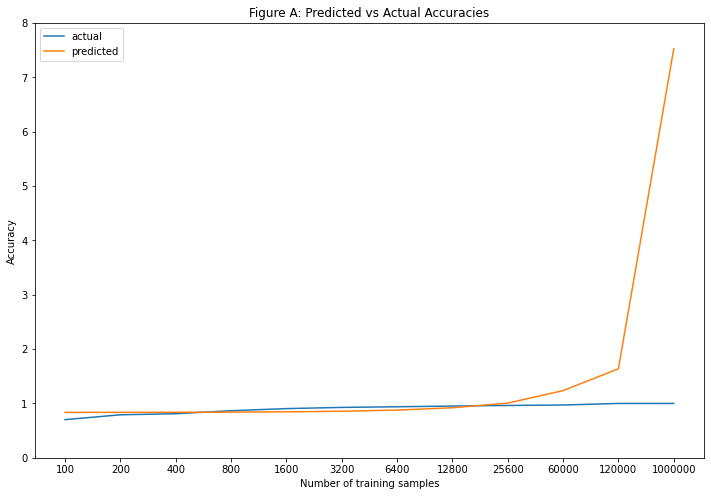

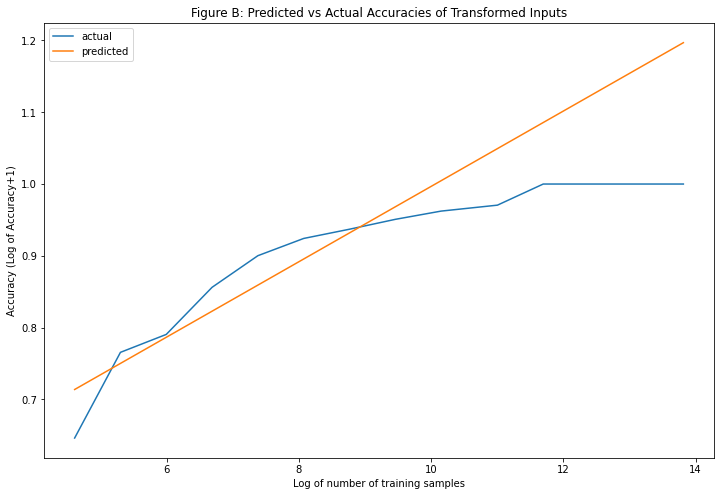

In [8]:
#def P4():

### STUDENT START ###
#Must run the cell above to get some of the values

# Produce a linear regression model that predicts accuracy of a 
# 1-Nearest Neighbor model given training set size.
lmodel = LinearRegression()
train_sizes = np.array(train_sizes).reshape(-1, 1)
train_accuracies =  np.array(accuracies).reshape(-1, 1)
lmodel.fit(train_sizes, train_accuracies)

print("Show  r2  of the linear regression model:")
print("R2 score:",   round(lmodel.score(train_sizes, train_accuracies), 2,),"\b")


print("Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.")
test_sizes = np.array([60000, 120000, 1000000]).reshape(-1, 1)
test_predicted_accuracies = lmodel.predict(test_sizes)
print(test_predicted_accuracies)

#Get predicted and actual for all training set sizes
#First get all the accuracies 
all_train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600, 60000, 120000, 1000000]
all_accuracies = []
for s in all_train_sizes: 
  train_data, train_labels = X[:s], Y[:s]
  model = KNeighborsClassifier(n_neighbors=1)
  model.fit(train_data, train_labels)
  test_predicted_labels = model.predict(dev_data)
  all_accuracies.append(sklearn.metrics.accuracy_score(dev_labels, test_predicted_labels))

#Get all of the predicted values
all_test_sizes = np.array(all_train_sizes).reshape(-1, 1)
test_predicted_accuracies = lmodel.predict(all_test_sizes)

#Create visual
string_of_sizes = ["100", "200", "400", "800", "1600", "3200", "6400", "12800", "25600", "60000", "120000", "1000000"]

plt.figure(figsize=(12,8))
plt.title("Figure A: Predicted vs Actual Accuracies")
plt.plot(string_of_sizes, all_accuracies, label='actual')
plt.plot(string_of_sizes, test_predicted_accuracies, label='predicted')
plt.ylim(0, 8)
plt.xlabel("Number of training samples")
plt.ylabel("Accuracy")
plt.legend()

#Apply a transformation to the predictor features and a transformation to the outcome that make the predictions more reasonable.  
#Trainform log+1 to get range from 0-1
train_accuracies_log = np.log(all_accuracies[:9]) + 1
train_sizes_log = np.log(all_test_sizes[:9])
lm_log_model = LinearRegression()
lm_log_model.fit(train_sizes_log, train_accuracies_log)
print("R2 of the improved linear regression model:", round(lm_log_model.score(train_sizes_log, train_accuracies_log),2))

#Show the accuracies predicted for training set sizes 60000, 120000, and 1000000. 
test_sizes_log = np.log(all_test_sizes[9:])
print("Transformed sizes:", test_sizes_log)
print("Predicted accuracies:", list(lm_log_model.predict(test_sizes_log)))
print("The predicted accuracies stay close to an upper range of 1")

#Show a lineplot of actual accuracies and predicted accuracies vs. 
#training set size over the range of training set sizes in the training data - 
#be sure to display accuracies and training set sizes in appropriate units.
plt.figure(figsize=(12,8))
plt.title("Figure B: Predicted vs Actual Accuracies of Transformed Inputs")
plt.plot(np.log(all_test_sizes), np.log(all_accuracies) +1, label='actual')
plt.plot(np.log(all_test_sizes), lm_log_model.predict(np.log(all_test_sizes)), label='predicted')
plt.xlabel("Log of number of training samples")
plt.ylabel("Accuracy (Log of Accuracy+1)")
plt.legend()

### STUDENT END ###
#test_sizes = [60000, 120000, 1000000]
#lm_log_model = model.predict(test_sizes)
#P4()

 **What's wrong with using linear regression here?**
ANSWER: Linear regression assumes that the accuracy will keep growing in a strait line (Figure A). But this cannot be true because the accuracy has a maximum value of 100. Transforming the variables flattens the slope of the line so that stays closer to 1 (Figure B). Though even with a transoformation my model is flawed because it does exceed 1 because it is a straight line and as X goes higher y will always go higher because of the linear relationship. 

### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.

Confusion matrix:
[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]


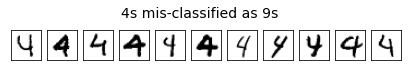

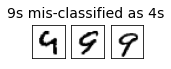

In [9]:
#def P5():

### STUDENT START ###
#Produce a 1-Nearest Neighbor model and show the confusion matrix. 
model = KNeighborsClassifier(n_neighbors=1)
model.fit(mini_train_data, mini_train_labels)
test_predicted_labels = model.predict(dev_data)
cm = confusion_matrix(dev_labels, test_predicted_labels, labels=["0","1","2","3","4","5","6","7","8","9"])
print("Confusion matrix:")
print(cm)

#Find the miscassified numbers and store them in arrays 
misclass4s = []
misclass9s = []
for i in range(len(dev_labels)):
  #Find 4 misclassified as 9s
  if (dev_labels[i] == "4") & (test_predicted_labels[i] == "9"):
    misclass4s.append(i)
  #Find 4 misclassified as 9s
  if (dev_labels[i] == "9") & (test_predicted_labels[i] == "4"):
    misclass9s.append(i)
  ### STUDENT END ###

fig=plt.figure(figsize=(7, 7))
plt.set_cmap('binary')
plt.suptitle('4s mis-classified as 9s', y=.58, fontsize=14)

columns = 11
rows = 1
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(dev_data[misclass4s[i-1]].reshape(28,28))
    plt.xticks([]),plt.yticks([])
plt.show()

fig=plt.figure(figsize=(2, 2))
plt.set_cmap('binary')
plt.suptitle('9s mis-classified as 4s', y=0.75, fontsize=14)

columns = 3
rows = 1
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(dev_data[misclass9s[i-1]].reshape(28,28))
    plt.xticks([]),plt.yticks([])
plt.show()

#P5()

ANSWER: 

### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur filter by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Pick a weight, then produce and evaluate four 1-Nearest Neighbor models by applying your blur filter in these ways:
- Do not use the filter
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracies of the four models evaluated as described.  Try to pick a weight that makes one model's accuracy at least 0.9.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* There are other Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but you are likely to get the best results with the simplified version described above.

Do not use the filter:
Acuracy =  0.884 

Filter the training data but not the dev data:
Acuracy =  0.894 

Filter the dev data but not the training data:
Acuracy =  0.885 

Filter both training data and dev data:
Acuracy =  0.896 

I got the highest accuracy by applying the blur to the training and test sets.
The highest accuracy that I could achieve with the Gaussian blur is 0.896. (Slighty less than 0.90).
Using a different filter, median_filter, I was able to achieve accuracy of 0.905. 

Median filter applied to both training data and dev data:
0.905


The median filter seems to create more of a thickening effect than a blur effect.


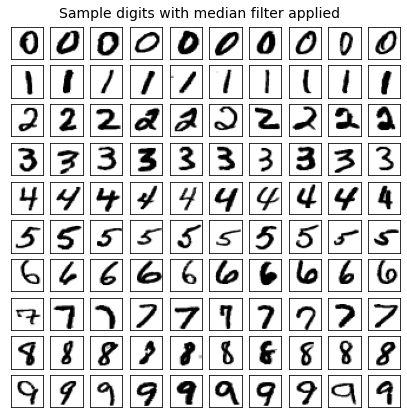

In [10]:
#def P6():
    
### STUDENT START ###

import scipy.misc
from scipy import ndimage

#Apply blur to data dets
sigma_val=1.365
#mini_train_data_blur = np.array([ndimage.gaussian_filter(x, sigma=sigma_val) for x in mini_train_data])
#dev_data_blur = np.array([ndimage.gaussian_filter(x, sigma=sigma_val) for x in dev_data])

mini_train_data_blur = np.array([ndimage.gaussian_filter(x, sigma=sigma_val) for x in mini_train_data])
dev_data_blur = np.array([ndimage.gaussian_filter(x, sigma=sigma_val) for x in dev_data])


print("Do not use the filter:")
model = KNeighborsClassifier(n_neighbors=1)
model.fit(mini_train_data, mini_train_labels)
test_predicted_labels = model.predict(dev_data)
print("Acuracy = ", sklearn.metrics.accuracy_score(dev_labels, test_predicted_labels) , "\n")

print("Filter the training data but not the dev data:")
model = KNeighborsClassifier(n_neighbors=1)
model.fit(mini_train_data_blur, mini_train_labels)
test_predicted_labels = model.predict(dev_data)
print("Acuracy = ", sklearn.metrics.accuracy_score(dev_labels, test_predicted_labels), "\n")

print("Filter the dev data but not the training data:")
model = KNeighborsClassifier(n_neighbors=1)
model.fit(mini_train_data, mini_train_labels)
test_predicted_labels = model.predict(dev_data_blur)
print("Acuracy = ", sklearn.metrics.accuracy_score(dev_labels, test_predicted_labels), "\n")

print("Filter both training data and dev data:")
model = KNeighborsClassifier(n_neighbors=1)
model.fit(mini_train_data_blur, mini_train_labels)
test_predicted_labels = model.predict(dev_data_blur)
print("Acuracy = ", sklearn.metrics.accuracy_score(dev_labels, test_predicted_labels), "\n")

print("I got the highest accuracy by applying the blur to the training and test sets.")
print("The highest accuracy that I could achieve with the Gaussian blur is 0.896. (Slighty less than 0.90).")
print("Using a different filter, median_filter, I was able to achieve accuracy of 0.905. \n")


mini_train_data_blur = np.array([ndimage.median_filter(x, 2) for x in mini_train_data])
dev_data_blur = np.array([ndimage.median_filter(x, 2) for x in dev_data])

#Filter both training data and dev data
model = KNeighborsClassifier(n_neighbors=1)
model.fit(mini_train_data_blur, mini_train_labels)
test_predicted_labels = model.predict(dev_data_blur)
print("Median filter applied to both training data and dev data:")
print(sklearn.metrics.accuracy_score(dev_labels, test_predicted_labels))
print("\n")
#Setup the plot grid and stlying 
f, axarr = plt.subplots(10, 10,figsize=(7,7))
plt.set_cmap('binary')
plt.setp(axarr, xticks=[], yticks=[])
plt.suptitle('Sample digits with median filter applied', y=0.92, fontsize=14)

#Iterate through each of the 10 digits
for d in range(10):
    n = 0
    #Iterate through the scanned digits
    for i in range(len(mini_train_labels)):
        #l stands for lable, which we want as an int
        l = int(mini_train_labels[i])
        #We want 10 samples of each digit
        #If the scanned digit matches the value we want for this row, render that item
        if n < 10 and l==d:
            axarr[d, n].imshow(mini_train_data_blur[i].reshape(28,28))
            n += 1

print("The median filter seems to create more of a thickening effect than a blur effect.")

### STUDENT END ###

#P6()

### Part 7:

Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.

For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter to set the white/black separation threshold to 0.1.  Use `BernoulliNB` to produce the model.

For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data, seting the white/gray/black separation thresholds to 0.1 and 0.9.  Use `MultinomialNB` to produce the model. 

Show the Bernoulli model accuracy and the Multinomial model accuracy.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* `sklearn`'s Naive Bayes methods can handle real numbers, but for this exercise explicitly do the mapping to categoricals. 

Does the multinomial version improve the results? Why or why not?

BernoulliNB_accuracy: 0.823

Multinomial_accuracy: 0.81

This matrix shows the difference between the Bernoulli_confusion_matrix and the Multinomial_confusion_matrix.


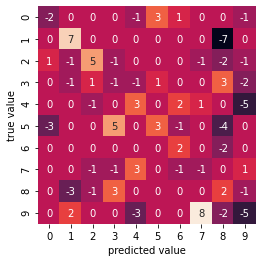

In [11]:
#def P7():

### STUDENT START ###

#Use Use BernoulliNB to produce model 1
model_Multinomial =  MultinomialNB(alpha=0.001)
model_Bernoulli =  BernoulliNB(alpha=0.001)

model_Bernoulli.fit(mini_train_data, mini_train_labels)
dev_predicted_labels = model_Bernoulli.predict(dev_data)
BernoulliNB_accuracy = sklearn.metrics.accuracy_score(dev_labels, dev_predicted_labels)
print("BernoulliNB_accuracy:", BernoulliNB_accuracy)

#print("\nBinomial confusion matrix:")
Bernoulli_confusion_matrix = confusion_matrix(dev_labels, dev_predicted_labels)
#print(Bernoulli_confusion_matrix)
#print(classification_report(dev_labels, dev_predicted_labels))

#Use MultinomialNB to produce the second model 
#Create a function to map pixel values to either 0, 1, or 2, representing white, gray, or black 
def greyscale(x):
  if x <= 0.1:
    return 0
  elif (x <= 0.9):
    return 1
  else:
    return 2

mini_train_data_multinomial = np.empty(mini_train_data.shape)
for i in range(len(mini_train_data)):
  mini_train_data_multinomial[i] = np.array([greyscale(x) for x in mini_train_data[i]])

model_Multinomial.fit(mini_train_data_multinomial, mini_train_labels)
dev_predicted_labels = model_Multinomial.predict(dev_data)
Multinomial_accuracy = sklearn.metrics.accuracy_score(dev_labels, dev_predicted_labels)
print("\nMultinomial_accuracy:", Multinomial_accuracy)

#print("\nMultinomial confusion matrix:")
Multinomial_confusion_matrix = confusion_matrix(dev_labels, dev_predicted_labels)
#print(Multinomial_confusion_matrix)
#print(classification_report(dev_labels, dev_predicted_labels))

#print(Bernoulli_confusion_matrix - Multinomial_confusion_matrix)
print("\nThis matrix shows the difference between the Bernoulli_confusion_matrix and the Multinomial_confusion_matrix.")
import seaborn as sns
sns.heatmap((Bernoulli_confusion_matrix - Multinomial_confusion_matrix), square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

### STUDENT END ###

#P7()

ANSWER: I get higher accuracy from the Binomial model (0.814) than the Multinomial model (0.807). The accuracies are very similar but the multinomial model does not perform better. I created a matrix that shows difference in the confusion matrices between the two models. It shows that the two models actually performed differently though the end accuracy was similar. For example looking at the row for the digit 1, the multimodal mdel was more likely to misclassify the number 1 as an 8, and the number 4 as a 9. 

### Part 8:

Search across several values of the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.

Notes:
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate performance by 5-fold cross-validation. 
* Use `GridSearchCV(..., ..., cv=..., scoring='accuracy', iid=False)` to vary alpha and evaluate performance by cross-validation.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you had used the dev set to evaluate performance.

What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

In [12]:
#def P8(alphas):

### STUDENT START ###
alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}

nb = GridSearchCV(BernoulliNB(binarize=0.0), alphas, cv=5, scoring='accuracy')
nb.fit(mini_train_data,mini_train_labels) # running the grid search
print("\nBest alpha = ", nb.best_params_)
print("Best score = ", nb.best_score_)
print("Accuracy of alphas near 0:", nb.cv_results_['mean_test_score'][0:2])
### STUDENT END ###

# alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
# nb = P8(alphas)
# print()
# print("Best alpha = ", nb.best_params_)


Best alpha =  {'alpha': 0.001}
Best score =  0.825
Accuracy of alphas near 0: [0.814 0.819]


ANSWER: The best value for alpha is 0.001, which is the third smallest one. The smaller alphas closer to zero (1.0e-10, 0.0001) have accuracies of 0.814 and 0.819 respectively. This is the same value that we got for the Bernoulli model in question 7, which also had an alpha of 0 (because it was not defined). But that is not what I expect because the model in question 7 had a binarize threshold of 0.1, so I thought that would make it perform better. But it seems that an alpha of 0.001 has the same effect as a binary threshold of 0.1. I did a test and combine an alpha of 0.001 and threshold of 0.1 and the accuracy went up to 0.829. 

### Part 9:

Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix.  Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Consider the effects of theta and sigma.  These are stored in the model's `theta_` and `sigma_` attributes.

Model 1 Acuracy =  0.593 



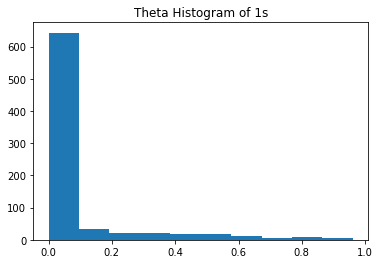

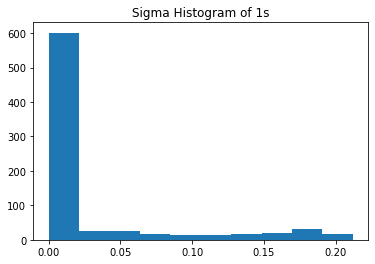


Model 2 accuracy =  0.811 



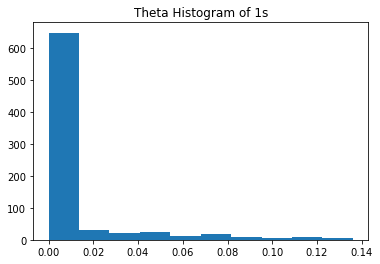

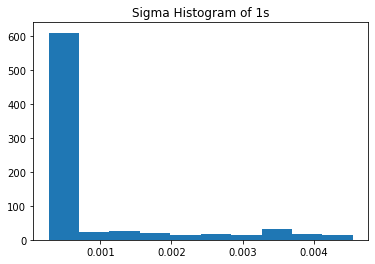

In [13]:
#def P9():

### STUDENT END ###

model = GaussianNB()
model.fit(mini_train_data, mini_train_labels)
test_predicted_labels = model.predict(dev_data)
print("Model 1 Acuracy = ", sklearn.metrics.accuracy_score(dev_labels, test_predicted_labels) , "\n")
plt.hist(model.theta_[1])
plt.title('Theta Histogram of 1s')
plt.show()
plt.hist(model.sigma_[1])
plt.title('Sigma Histogram of 1s')

plt.show()

from sklearn import preprocessing
scaler = preprocessing.Normalizer()
mini_train_data_scaled = scaler.fit_transform(mini_train_data)
dev_data_scaled = scaler.fit_transform(dev_data)

model2 = GaussianNB(var_smoothing=0.1)
model2.fit(mini_train_data_scaled, mini_train_labels)
test_predicted_labels = model2.predict(dev_data_scaled)
print("\nModel 2 accuracy = ", sklearn.metrics.accuracy_score(dev_labels, test_predicted_labels) , "\n")

plt.hist(model2.theta_[1])
plt.title('Theta Histogram of 1s')
plt.show()
plt.hist(model2.sigma_[1])
plt.title('Sigma Histogram of 1s')
plt.show()

### STUDENT END ###

#P9()

***ANSWER***: The performance of the basic model was  0.59 and I improved it to 0.754 but I am not sure if I made the improvement you were looking for. I Checked the Theta and Sigma of each model and they don't look very different. 

### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.  Show the grid.

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.

How do the generated digit images compare to the training digit images?

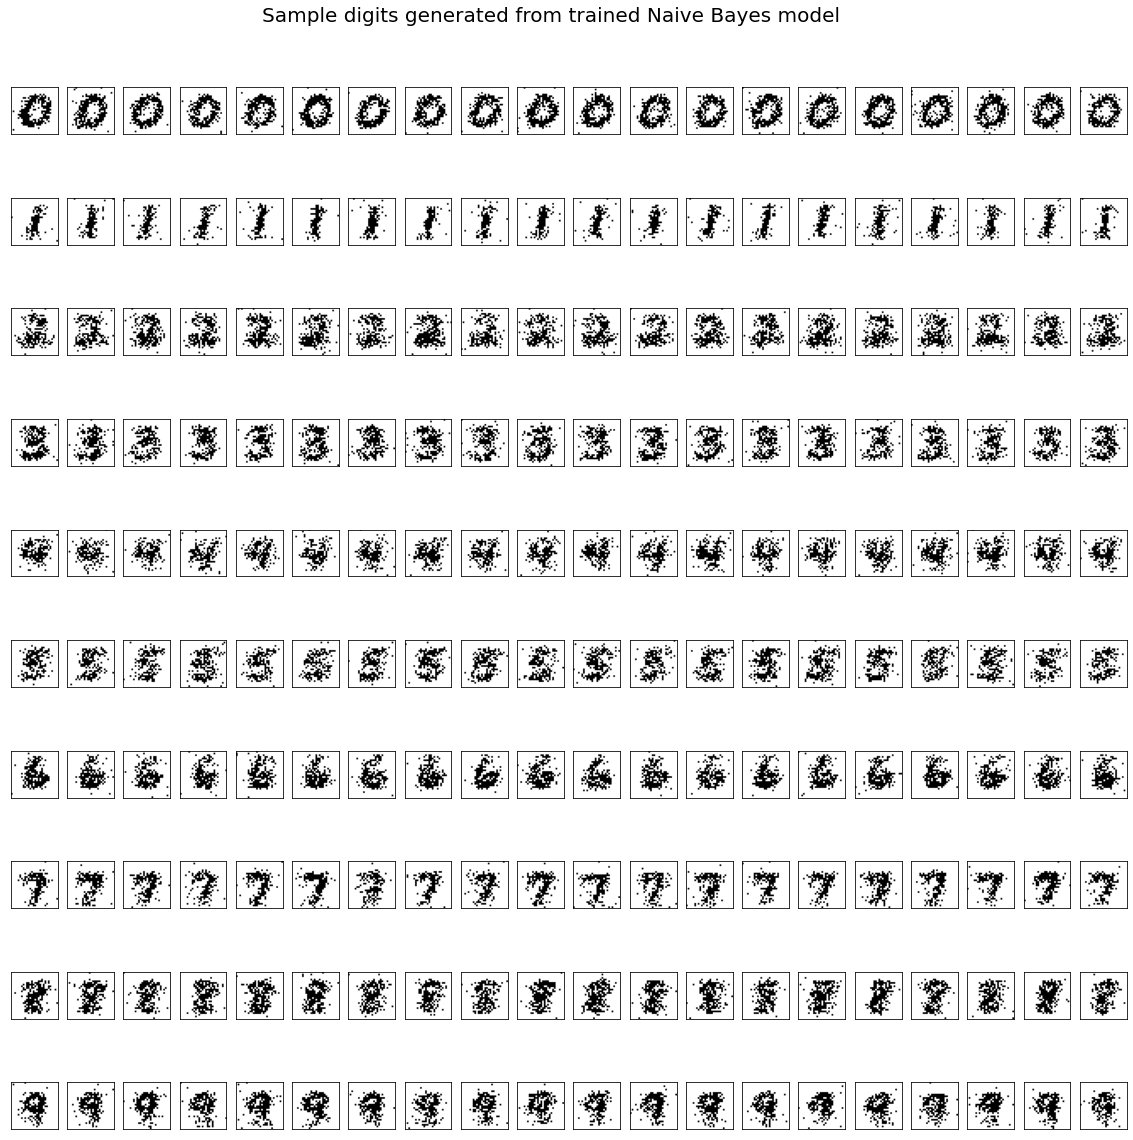

In [14]:
#def P10(num_examples):

### STUDENT START ###

#Produce a Bernoulli Naive Bayes model
model_Bernoulli = BernoulliNB(binarize=0.0)
model_Bernoulli.fit(mini_train_data, mini_train_labels)

#The estimated probability of each pixel being 0 or 1 is stored in the model's feature_log_prob_ attribute
feature_prob = np.exp(model_Bernoulli.feature_log_prob_)

#generate a 10x20 grid with 20 example images of each digit
f, axarr = plt.subplots(10, 20,figsize=(20,20))
plt.set_cmap('binary')
plt.setp(axarr, xticks=[], yticks=[])
plt.suptitle('Sample digits generated from trained Naive Bayes model', y=0.92, fontsize=20)

for d in range(10):
  for i in range(20):
    generated_image = np.random.binomial(1, feature_prob[d])
    axarr[d, i].imshow(generated_image.reshape(28,28))


### STUDENT END ###

#P10(20)

ANSWER: The samples digits are all basically the same shape. For example the 7s are all basically the same. The variations is in the amount of "noise", random pixels in the grid. The basic shape is basically an average of all the samples and the noise is random based on the probability of something being in that pixel. What the model does not consider is the conditional probability based on other pixels. In the samples there are very few free floating pixels, but the model does not understand that.

### Part 11:

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.

Notes:
* Set LaPlace smoothing (alpha) to the optimal value (from part 8).
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate perfromance on the dev set.

How would you characterize the calibration for this Bernoulli Naive Bayes model?

,Probability,Correct,Total,Accuracy
Buckets,,,,
1,0.5,11,31,0.355
2,0.9,29,67,0.433
3,0.999,27,59,0.458
4,0.99999,30,46,0.652
5,0.9999999,48,62,0.774
6,0.999999999,26,33,0.788
7,0.99999999999,34,43,0.791
8,0.9999999999999,16,19,0.842
9,1.0,602,640,0.941


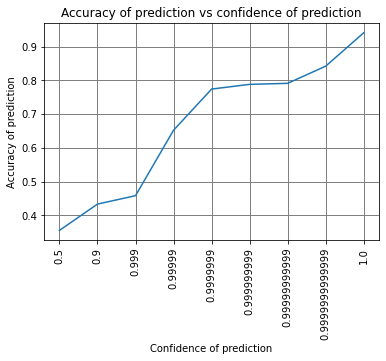

In [15]:
#def P11(buckets, correct, total):
    
### STUDENT START ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]

#Produce a Bernoulli Naive Bayes model.
#Set LaPlace smoothing (alpha) to the optimal value (from part 8)
#Set binarization threshold to 0.
model = BernoulliNB(alpha=0.001, binarize=0)
#Train on the mini train set.
model.fit(mini_train_data,mini_train_labels) 
#Evaluate perfromance on the dev set.
dev_data_probs = model.predict_proba(dev_data)

dev_data_maxprob = []
dev_data_maxprediction = []

#for each prediction, find the bucket to which the maximum posterior probability belongs
for i in range(len(dev_data_probs)):
  dev_data_maxprob.append(max(dev_data_probs[i]))
  dev_data_maxprediction.append(np.argmax(dev_data_probs[i]))
dev_data_buckets = np.digitize(dev_data_maxprob, buckets)

#Put the score, labels, and predictions into a table for easy calculation 
import pandas as pd
prob_buckets = pd.DataFrame()
prob_buckets["Buckets"] = dev_data_buckets
prob_buckets["Prediction"] = dev_data_maxprediction
prob_buckets["TrueLabel"] = dev_labels
prob_buckets["TrueLabel"] = prob_buckets["TrueLabel"].astype(int)
prob_buckets["Correct"] = prob_buckets.Prediction == prob_buckets.TrueLabel
prob_buckets["Correct"] = prob_buckets["Correct"].astype(int)
prob_buckets["Total"] = 1

#Summarize by bucket
prob_buckets_groups = prob_buckets.groupby("Buckets").sum()
prob_buckets_groups = prob_buckets_groups.drop(["TrueLabel", "Prediction"], axis=1)
prob_buckets_groups.insert(0,'Probability', buckets)
prob_buckets_groups["Probability"] = prob_buckets_groups["Probability"].astype(str)
prob_buckets_groups["Accuracy"] = round(prob_buckets_groups["Correct"] / prob_buckets_groups["Total"], 3)

plt.title("Accuracy of prediction vs confidence of prediction")
plt.plot(prob_buckets_groups["Probability"], prob_buckets_groups["Accuracy"])
plt.xticks(rotation=90)
plt.xlabel("Confidence of prediction")
plt.ylabel("Accuracy of prediction")
plt.grid(color='gray', linestyle='-', linewidth=1)

(prob_buckets_groups)

### STUDENT END ###

# P11(buckets, correct, total)

# for i in range(len(buckets)):
#     accuracy = 0.0
#     if (total[i] > 0): accuracy = correct[i] / total[i]
#     print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))

ANSWER:I would categorize this as a weakly calibrated model. It is good in the sense that as the confidence improves the accuracy improves. And at the upper end when the model is 100% confident then the accuracy is 94%  